In [1]:
setwd("~/IBM_Attrition_DataChallenge/") # sets proper working directory

In [2]:
# import R libraries to use later
suppressPackageStartupMessages(library('caret'))
suppressPackageStartupMessages(library('mlbench'))
suppressPackageStartupMessages(library(plyr))

# Read in Cleaned Data

We will first read in the data we prepared in our other notebook, R_ModelData

In [3]:
df <- read.csv(file='attrition_model_data_cleaned.csv') 
head(df)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,⋯,JobRole_Research.Director,JobRole_Research.Scientist,JobRole_Sales.Executive,JobRole_Sales.Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,60,696,7,4,2,52,4,4,5220,10893,⋯,0,0,1,0,1,0,0,0,1,No
2,23,650,9,1,2,37,3,1,2500,4344,⋯,0,0,0,0,0,1,0,1,0,No
3,34,829,15,3,2,71,3,1,17007,11929,⋯,1,0,0,0,1,0,0,1,0,No
4,42,622,2,4,3,81,3,4,4089,5718,⋯,0,0,0,0,0,1,0,1,0,No
5,36,1480,3,2,4,30,3,2,2088,15062,⋯,0,0,0,0,0,0,1,1,0,No
6,38,653,29,5,4,50,3,4,2406,5456,⋯,0,0,0,0,0,0,1,1,0,No


# Splitting the Data

We will use the Machine Learning package H2O in R to develop numerous ML models to compare against each other and find the best solution. Remember that anything less than 83 percent is not good.

In [4]:
# initialize and import supporting packages for h2o
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(h2o))
h2o.init(nthreads = -1)

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         13 hours 45 minutes 
    H2O cluster timezone:       America/Los_Angeles 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.30.1.2 
    H2O cluster version age:    8 days  
    H2O cluster name:           H2O_from_python_naveenmirapuri_9i7lvx 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.18 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4 
    R Version:                  R version 4.0.2 (2020-06-22) 



In [5]:
# we will have to convert our df to an h2o-compatible frame
dfH2O <- as.h2o(df)
dfH2O['Attrition'] = as.factor(dfH2O['Attrition'])

  |======================================================================| 100%


In [6]:
dim(dfH2O)   # returns the dimensions of the dataframe to get a better idea before modeling

[1] 3081   52

We will now have to split our H2O frame into a train, cross-validation, and testing set, each of which will be used to evaluate our model. We will use 60% for training, 20% for validation, and 20% for testing, chosen at random

In [7]:
split <- h2o.splitFrame(dfH2O, ratios = c(0.6,0.2), seed = 1234)
train <- split[[1]]
valid <- split[[2]]
test <- split[[3]]

For our model, we will set our response variable (what we are trying to predict) to Attrition, and our predictors to all of our df columns EXCEPT attrition, as we don't want to use attrition to predict attrition.

In [8]:
response <- "Attrition"
predictors <- setdiff(names(df), response)
predictors # displays all of the variables we will use to predict attrition

[1] "Age"                               "DailyRate"                        
 [3] "DistanceFromHome"                  "Education"                        
 [5] "EnvironmentSatisfaction"           "HourlyRate"                       
 [7] "JobInvolvement"                    "JobSatisfaction"                  
 [9] "MonthlyIncome"                     "MonthlyRate"                      
[11] "NumCompaniesWorked"                "PerformanceRating"                
[13] "RelationshipSatisfaction"          "StockOptionLevel"                 
[15] "TrainingTimesLastYear"             "WorkLifeBalance"                  
[17] "YearsInCurrentRole"                "YearsSinceLastPromotion"          
[19] "YearsWithCurrManager"              "JobLevel"                         
[21] "PercentSalaryHike"                 "TotalWorkingYears"                
[23] "YearsAtCompany"                    "BusinessTravel_Non.Travel"        
[25] "BusinessTravel_Travel_Frequently"  "BusinessTravel_Travel_Rarely"     
[27] "Department_Human.Resources"        "Department_Research...Development"
[29] "Department_Sales"                  "EducationField_Human.Resources"   
[31] "EducationField_Life.Sciences"      "EducationField_Marketing"         
[33] "EducationField_Medical"            "EducationField_Other"             
[35] "EducationField_Technical.Degree"   "Gender_Female"                    
[37] "Gender_Male"                       "JobRole_Healthcare.Representative"
[39] "JobRole_Human.Resources"           "JobRole_Laboratory.Technician"    
[41] "JobRole_Manager"                   "JobRole_Manufacturing.Director"   
[43] "JobRole_Research.Director"         "JobRole_Research.Scientist"       
[45] "JobRole_Sales.Executive"           "JobRole_Sales.Representative"     
[47] "MaritalStatus_Divorced"            "MaritalStatus_Married"            
[49] "MaritalStatus_Single"              "OverTime_No"                      
[51] "OverTime_Yes"

# Building the Four Models
### 1. Logistic Regression with Random Hyperparameter Search
### 2. Random Forest with Random Hyperparameter Search
### 3. Gradient Boosting Machine with Random Hyperparameter Search
### 4. Neural Network with Random Hyperparameter Search

# Logistic Regression with Random Hyperparameter Search

First, we will start with the Logistic Regression with Random Hyperparameter Search. Hyperparameters are all the different variables (iterations, batches, max run time, etc.) that can significantly change the performance of the model. In this model we have two hyperparams to control all of these variables. Thus, we will search for the best combination in a grid, then extract the best results for logistic regression with the best hyperparameters.

In [9]:
hyper_params <- list(alpha = seq(from = 0, to = 1, by = 0.001),
                    lambda = seq(from = 0, to = 1, by = 0.000001)
                    )

In [10]:
search_criteria <- list(strategy = "RandomDiscrete",
                        max_runtime_secs = 10*3600,
                        max_models = 100,
                        stopping_metric = "AUC", 
                        stopping_tolerance = 0.00001, 
                        stopping_rounds = 5, 
                        seed = 1234
                        )

In [11]:
# We will ignore warnings to increase readibility and create a grid of models with different parameters
suppressWarnings(models_glm <- h2o.grid(algorithm = "glm", grid_id = "grd_glm", x = predictors, y = response, 
                       training_frame = train, validation_frame = valid, 
                       nfolds = 0, family = "binomial", hyper_params = hyper_params, 
                       search_criteria = search_criteria, stopping_metric = "AUC", 
                       stopping_tolerance = 1e-5, stopping_rounds = 5, max_iterations = 1000,
                       seed = 1234))


  |======================================================================| 100%


We have a grid of model results, now it is time to select the best one and find its accuracy

In [12]:
models_glm_sort <- h2o.getGrid(grid_id = "grd_glm", sort_by = "auc", decreasing = TRUE)
models_glm_best <- h2o.getModel(models_glm_sort@model_ids[[1]])

In [13]:
# Gets the auc metric for the best model
models_glm_best@model$validation_metrics@metrics$AUC

[1] 0.88641

## Logistic Regression AUC: 0.8864

We can also now also plot the performance of our model using h2o!

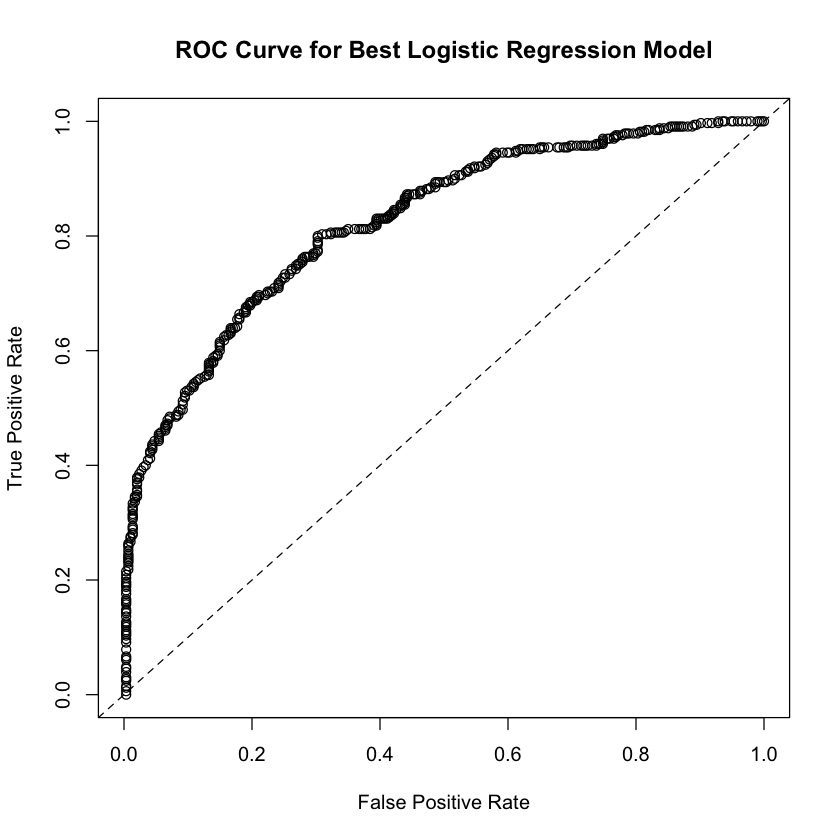

In [14]:
perf_glm_best <- h2o.performance(models_glm_best, valid)
plot(perf_glm_best, type="roc", main="ROC Curve for Best Logistic Regression Model")

We can also find which variables were the most important for this model!

In [59]:
#Variable importance
head(h2o.varimp(models_glm_best))

,variable,relative_importance,scaled_importance,percentage
,<chr>,<dbl>,<dbl>,<dbl>
1,EnvironmentSatisfaction,0.4814844,1.0000000,0.04386678
2,YearsAtCompany,0.4757767,0.9881457,0.04334677
3,YearsSinceLastPromotion,0.4678138,0.9716075,0.04262129
4,BusinessTravel_Non-Travel,0.4631393,0.9618989,0.04219540
5,OverTime_Yes,0.4400190,0.9138802,0.04008898
6,OverTime_No,0.4400190,0.9138802,0.04008898


## Logistic Regression Important Variables
#### 1. Environment Satisfaction
#### 2. Years At Company
#### 3. Years Since Last Promotion
#### 4. Business Travel
#### 5. Overtime

# Random Forest with Random Hyperparameter Search

Now we will use a random forest model with random hyperparameter search!

In [16]:
hyper_params <- list(ntrees = 10000,  ## early stopping
                    max_depth = 5:15, 
                    min_rows = c(1,5,10,20,50,100),
                    nbins = c(30,100,300),
                    nbins_cats = c(64,256,1024),
                    sample_rate = c(0.7,1),
                    mtries = c(-1,2,6)
                    )


In [17]:
search_criteria <- list(strategy = "RandomDiscrete",
                        max_runtime_secs = 10*3600,
                        max_models = 100,
                        stopping_metric = "AUC", 
                        stopping_tolerance = 0.00001, 
                        stopping_rounds = 5, 
                        seed = 1234
                        )

In [18]:
# grid of models with different parameters
models_rf <- h2o.grid(algorithm = "randomForest", grid_id = "grd_rf", x = predictors, y = "Attrition",
                      training_frame = train, validation_frame = valid, nfolds = 0, hyper_params = hyper_params,
                      search_criteria = search_criteria, stopping_metric = "AUC", stopping_tolerance = 1e-3, 
                      stopping_rounds = 2, seed = 1234)


  |======================================================================| 100%


In [19]:
# Use the grid of models to identify the best one
models_rf_sort <- h2o.getGrid(grid_id = "grd_rf", sort_by = "auc", decreasing = TRUE)
models_rf_best <- h2o.getModel(models_rf_sort@model_ids[[1]])

In [20]:
models_rf_best@model$validation_metrics@metrics$AUC

[1] 0.983859

# Random Forest AUC: 0.9839

YEESSS this is dope, we have a great AUC!! We can now plot the ROC curve for this model!

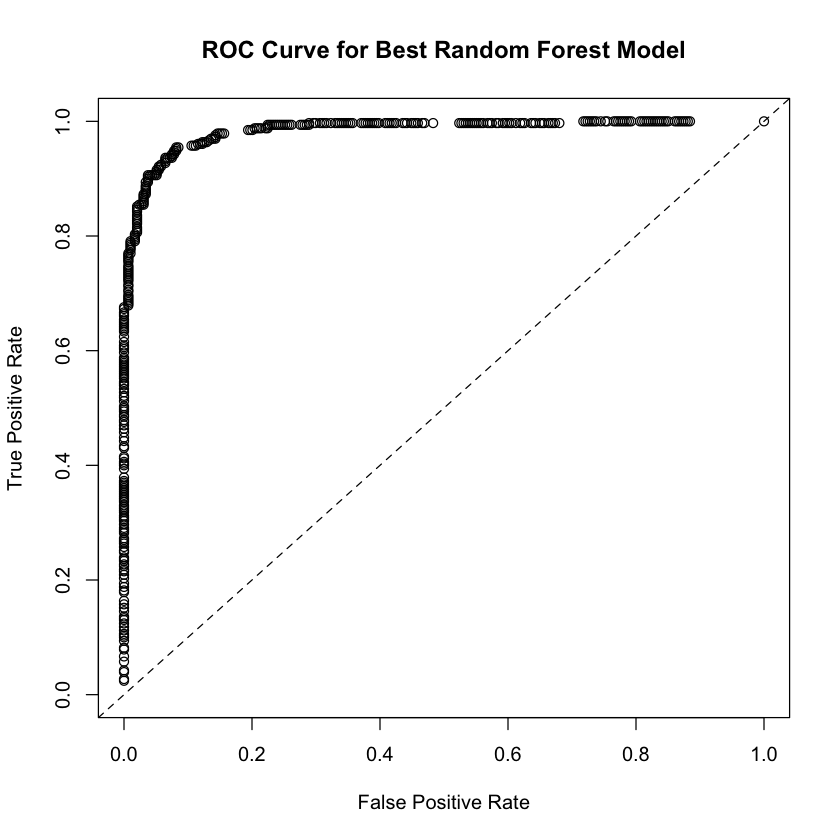

In [21]:
#ROC curve for the validation dataset
perf_rf_best <- h2o.performance(models_rf_best, valid)
plot(perf_rf_best, type="roc", main="ROC Curve for Best Random Forest Model")

In [60]:
#Variable importance
head(h2o.varimp(models_rf_best))

,variable,relative_importance,scaled_importance,percentage
,<chr>,<dbl>,<dbl>,<dbl>
1,JobSatisfaction,374.5323,1.0000000,0.08391353
2,StockOptionLevel,327.1390,0.8734599,0.07329510
3,OverTime_No,194.6284,0.5196570,0.04360626
4,YearsWithCurrManager,187.0468,0.4994144,0.04190762
5,OverTime_Yes,184.5924,0.4928612,0.04135772
6,MaritalStatus_Single,179.1415,0.4783071,0.04013643


## Random Forest Model Important Variables
#### 1. Job Satisfaction
#### 2. Stock Option Level
#### 3. Overtime No
#### 4. Years With Current Manager
#### 5. Overtime Yes

# Gradient Boosted Model with Random Hyperparameter Search

We will also build a gradient boosted model with hyperparameter searching as well. This model is particularly good at optimizing and learning through the use of the gradient descent functionality.

In [23]:
hyper_params <- list(ntrees = 10000,  ## early stopping
                     max_depth = 5:15, 
                     min_rows = c(1,5,10,20,50,100),
                     learn_rate = c(0.001,0.01,0.1),  
                     learn_rate_annealing = c(0.99,0.999,1),
                     sample_rate = c(0.7,1),
                     col_sample_rate = c(0.7,1),
                     nbins = c(30,100,300),
                     nbins_cats = c(64,256,1024)
                     )

In [24]:
search_criteria <- list(strategy = "RandomDiscrete",
                        max_runtime_secs = 10*3600,
                        max_models = 100,
                        stopping_metric = "AUC", 
                        stopping_tolerance = 0.00001, 
                        stopping_rounds = 5, 
                        seed = 1234
                        )

In [25]:
# grid of models with different parameters
models_gbm <- h2o.grid(algorithm = "gbm", grid_id = "grd_gbm", x = predictors, y = "Attrition",
                       training_frame = train, validation_frame = valid, 
                       nfolds = 0, hyper_params = hyper_params, search_criteria = search_criteria, 
                       stopping_metric = "AUC", stopping_tolerance = 1e-3, stopping_rounds = 2, seed = 1234)

  |======================================================================| 100%


In [26]:
# we will now use the grid of models to identify the best one
models_gbm_sort <- h2o.getGrid(grid_id = "grd_gbm", sort_by = "auc", decreasing = TRUE)
models_gbm_best <- h2o.getModel(models_gbm_sort@model_ids[[1]])

In [28]:
# Can now identify the best AUC validation
models_gbm_best@model$validation_metrics@metrics$AUC

[1] 0.9811688

# Gradient Boosting Model AUC: 0.9812

Damnnnnn we did it again! We got a super high AUC, so now let's go ahead and plot the ROC!

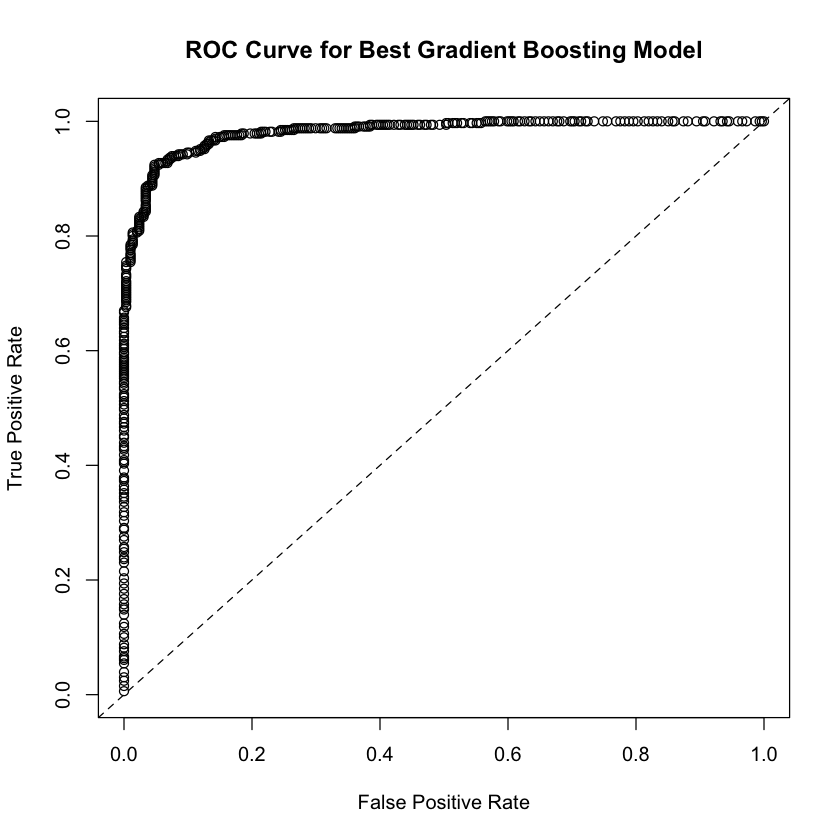

In [29]:
#ROC curve for the validation dataset
perf_gbm_best <- h2o.performance(models_gbm_best, valid)
plot(perf_gbm_best, type="roc", main="ROC Curve for Best Gradient Boosting Model")

As we mentioned earlier, the Gradient descent optimization works amazingly fast, which is why the graph is so vertical!

Now we need to find the importance of each variable for the gradient model. This is a bit harder, as h2o does not support an easy way to get this info from the GBM. Thus, we will have to refer to a github repo called 'vip' to get and display the most influential variables!

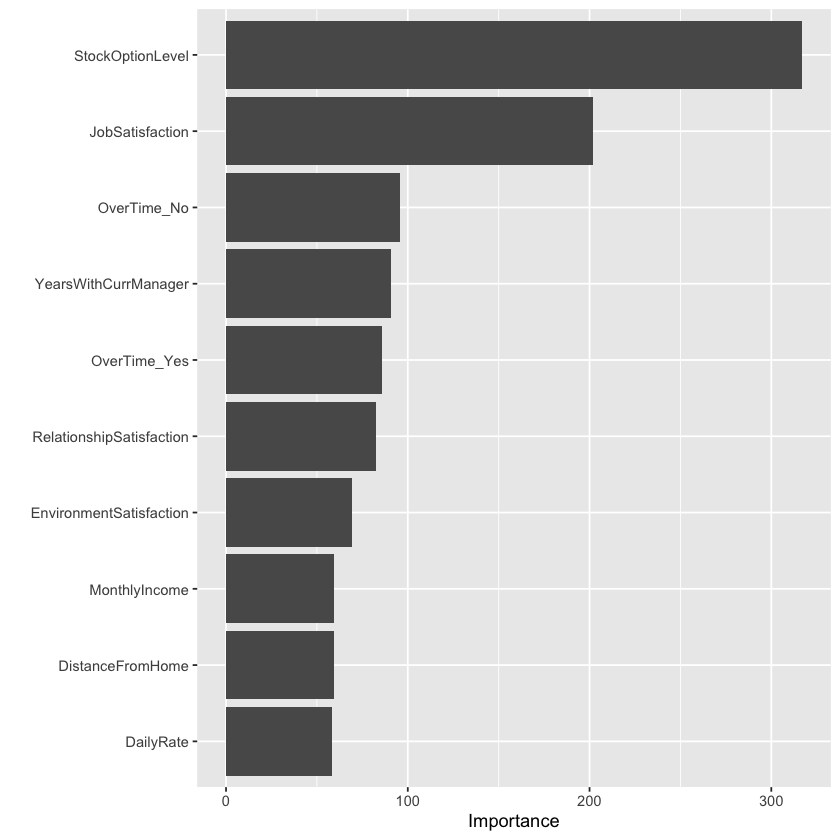

In [68]:
# devtools::install_github("koalaverse/vip")
vip::vip(models_gbm_best)

In [69]:
head(h2o.varimp(models_gbm_best))

,variable,relative_importance,scaled_importance,percentage
,<chr>,<dbl>,<dbl>,<dbl>
1,StockOptionLevel,316.92636,1.0000000,0.16166779
2,JobSatisfaction,201.95828,0.6372404,0.10302125
3,OverTime_No,95.89323,0.3025726,0.04891624
4,YearsWithCurrManager,90.54800,0.2857067,0.04618958
5,OverTime_Yes,85.98659,0.2713141,0.04386275
6,RelationshipSatisfaction,82.49544,0.2602984,0.04208187


## Gradient Boosting Model Important Variables
#### 1. Stock Option Level
#### 2. Job Satisfaction
#### 3. Overtime No
#### 4. Years With Current Manager
#### 5. Overtime Yes

# Neural Network with Random Hyperparameter Search

We will now use what is usually one of the best classifiers, a neural network model with random hyperparameter search. This type of network uses activation layers, connectivity weights, and hidden layers to feed the parameters through a network, that once trained, is accurate in identifying attrition!

In [35]:
hyper_params <- list(activation = c("Rectifier", "Maxout", "Tanh", "RectifierWithDropout", "MaxoutWithDropout", "TanhWithDropout"), 
                     hidden = list(c(50, 50, 50, 50), c(200, 200), c(200, 200, 200), c(200, 200, 200, 200)), 
                     epochs = c(50, 100, 200), 
                     l1 = c(0, 0.00001, 0.0001), 
                     l2 = c(0, 0.00001, 0.0001), 
                     adaptive_rate = c(TRUE, FALSE), 
                     rate = c(0, 0.1, 0.005, 0.001), 
                     rate_annealing = c(1e-8, 1e-7, 1e-6), 
                     rho = c(0.9, 0.95, 0.99, 0.999), 
                     epsilon = c(1e-10, 1e-8, 1e-6, 1e-4), 
                     momentum_start = c(0, 0.5),
                     momentum_stable = c(0.99, 0.5, 0), 
                     input_dropout_ratio = c(0, 0.1, 0.2)
                     )


In [36]:
search_criteria <- list(strategy = "RandomDiscrete",
                        max_runtime_secs = 10*3600,
                        max_models = 100,
                        stopping_metric = "AUC", 
                        stopping_tolerance = 0.00001, 
                        stopping_rounds = 5, 
                        seed = 1234
                        )

In [37]:
# grid of models with different parameters
models_dl <- h2o.grid(algorithm = "deeplearning", grid_id = "grd_dl", x = predictors, y = "Attrition",
                      training_frame = train, validation_frame = valid, nfolds = 0, hyper_params = hyper_params,
                      search_criteria = search_criteria, stopping_metric = "AUC", stopping_tolerance = 1e-3, 
                      stopping_rounds = 2, seed = 1234)


  |======================================================================| 100%


Warning message in h2o.getGrid(grid_id = grid_id):
“Some models were not built due to a failure, for more details run `summary(grid_object, show_stack_traces = TRUE)`”


In [38]:
# now we will extract the best model
models_dl_sort <- h2o.getGrid(grid_id = "grd_dl", sort_by = "auc", decreasing = TRUE)
models_dl_best <- h2o.getModel(models_dl_sort@model_ids[[1]])

Warning message in h2o.getGrid(grid_id = "grd_dl", sort_by = "auc", decreasing = TRUE):
“Some models were not built due to a failure, for more details run `summary(grid_object, show_stack_traces = TRUE)`”


In [39]:
# Gets the AUC metric for the best neural network model
models_dl_best@model$validation_metrics@metrics$AUC

[1] 0.994965

# Neural Network AUC: 0.9950

WHOAAAA IT'S INSANEEE. Our best neural network had an AUC of 0.9950! Like we initially thought, the neural network performed amazingly. This is great, so lets dissect the models a bit more.

We will graph the ROC curve for the neural networks now.

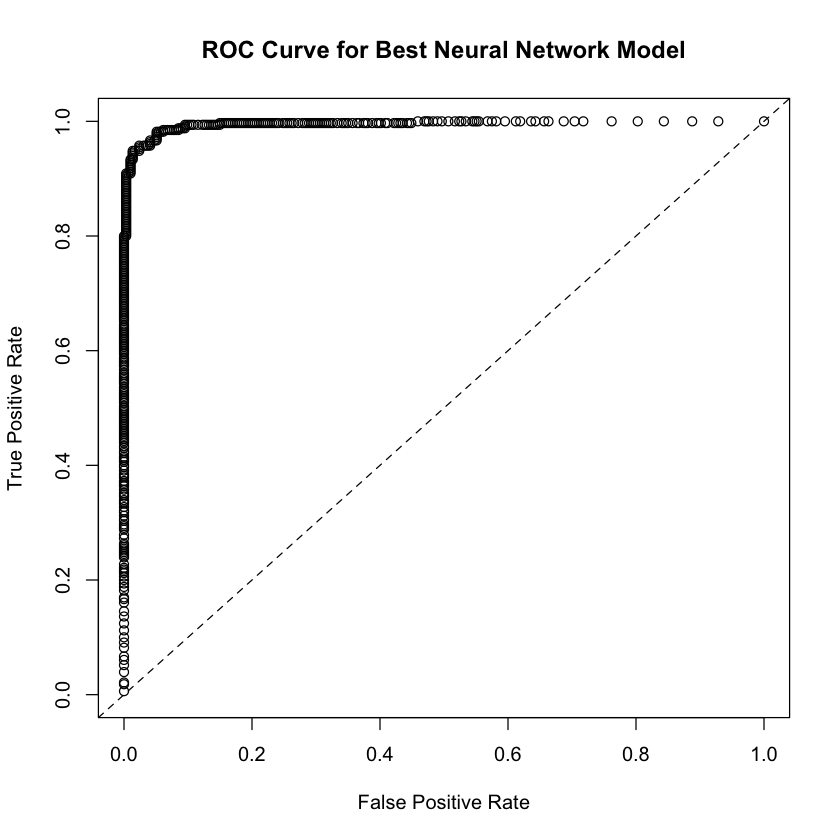

In [41]:
# Creates the ROC curve
perf_dl_best <- h2o.performance(models_dl_best, valid)
plot(perf_dl_best, type="roc", main="ROC Curve for Best Neural Network Model")

Variable importances for Neural Network models are notoriously difficult to compute, and there are many pitfalls. H2O Deep Learning has implemented the method of Gedeon, and returns relative variable importances in descending order of importance.

In [66]:
head(as.data.frame(h2o.varimp(models_dl_best)))

,variable,relative_importance,scaled_importance,percentage
,<chr>,<dbl>,<dbl>,<dbl>
1,JobSatisfaction,1.0000000,1.0000000,0.02397074
2,JobInvolvement,0.9908275,0.9908275,0.02375086
3,EnvironmentSatisfaction,0.9739157,0.9739157,0.02334548
4,HourlyRate,0.9585391,0.9585391,0.02297689
5,MonthlyRate,0.9360994,0.9360994,0.02243899
6,Age,0.9334061,0.9334061,0.02237443


## Neural Network Important Variables
#### 1. Job Satisfaction
#### 2. Job Involvement
#### 3. Environment Satisfaction
#### 4. Hourly Rate
#### 5. Monthly Rate

#### Ensemble Model (NO LONGER USING, AFTER PERFORMANCE OF NEURAL NET WAS 0.99+)

In [53]:
#md_ens <- h2o.stackedEnsemble(x = predictors, y = "Attrition", training_frame = train, 
#                              base_models = list(models_glm_best, models_rf_best, models_gbm_best, models_dl_best))


# Model Comparison

We can now compare the best of our four types of models and choose the best one! We will use the validation set to compare!

### Logistic Regression

In [48]:
h2o.auc(h2o.performance(models_glm_best, valid))

[1] 0.8243558

### Random Forest

In [49]:
h2o.auc(h2o.performance(models_rf_best, valid))

[1] 0.983859

### Gradient Boosting Model

In [54]:
h2o.auc(h2o.performance(models_gbm_best, valid))

[1] 0.9811688

### Neural Network

In [55]:
h2o.auc(h2o.performance(models_dl_best, valid))

[1] 0.994965

We can see the Neural Network is the best of the four in predicting attrition on the validation set! With this information we can now calculate the AUC and ROC curve on the TEST set. 

In [56]:
h2o.auc(h2o.performance(models_dl_best, test))

[1] 0.9904966

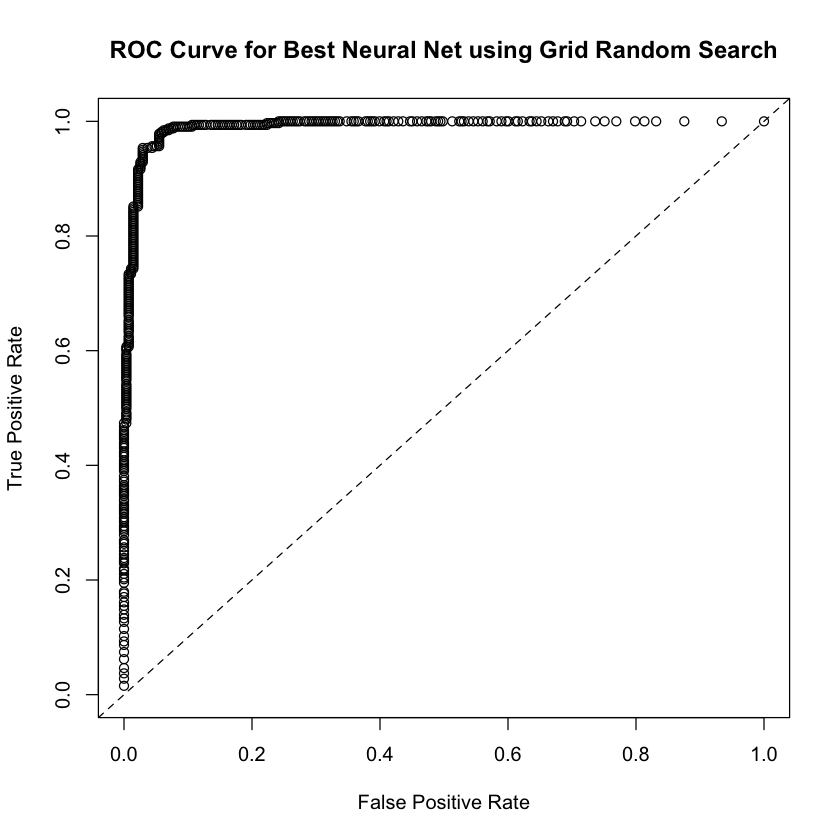

In [70]:
perf_best_model <- h2o.performance(models_dl_best, test)
plot(perf_best_model, type="roc", main="ROC Curve for Best Neural Net using Grid Random Search")

In [67]:
h2o.performance(models_dl_best, test)

H2OBinomialMetrics: deeplearning

MSE:  0.03181172
RMSE:  0.1783584
LogLoss:  0.1297769
Mean Per-Class Error:  0.03887547
AUC:  0.9904966
AUCPR:  0.9909821
Gini:  0.9809932

Confusion Matrix (vertical: actual; across: predicted) for F1-optimal threshold:
        No Yes    Error     Rate
No     256  17 0.062271  =17/273
Yes      5 318 0.015480   =5/323
Totals 261 335 0.036913  =22/596

Maximum Metrics: Maximum metrics at their respective thresholds
                        metric threshold      value idx
1                       max f1  0.521855   0.966565 257
2                       max f2  0.344085   0.979792 263
3                 max f0point5  0.854202   0.970384 240
4                 max accuracy  0.613159   0.963087 253
5                max precision  0.999998   1.000000   0
6                   max recall  0.002360   1.000000 309
7              max specificity  0.999998   1.000000   0
8             max absolute_mcc  0.521855   0.926165 257
9   max min_per_class_accuracy  0.805510   0

We can see that the model continues to work great on the test set! This is promising, it means that we don't have a high bias (indicating underfitting) or a high variance (indicating overfitting). Thus, we have our final model, and it works great!